In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats

from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xg
from sklearn.ensemble import StackingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [85]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [86]:
data = pd.concat([train_data,test_data], ignore_index = False)

In [87]:
print(f'Shape of train data { train_data.shape}')
print(f'Shape of test data { test_data.shape}')
print(f'Combined Data {data.shape}')

Shape of train data (550068, 12)
Shape of test data (233599, 11)
Combined Data (783667, 12)


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [89]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [90]:
# Stay in Current City Years
# data.Stay_In_Current_City_Years.unique() 
# pd.to_numeric() -- for numeric conversion

data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.replace('4+', '4').astype(int)

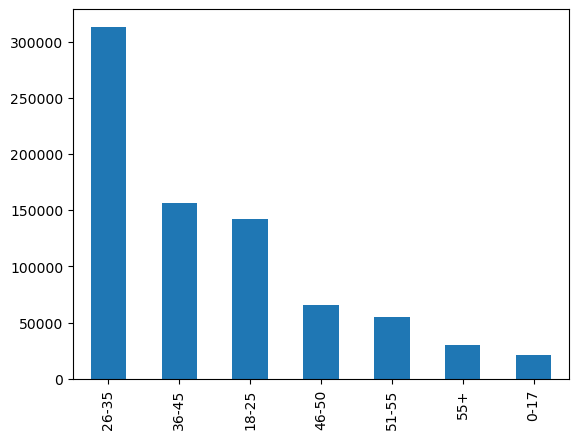

In [91]:
# Age
data.Age.value_counts().plot(kind = 'bar');

In [92]:
data.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


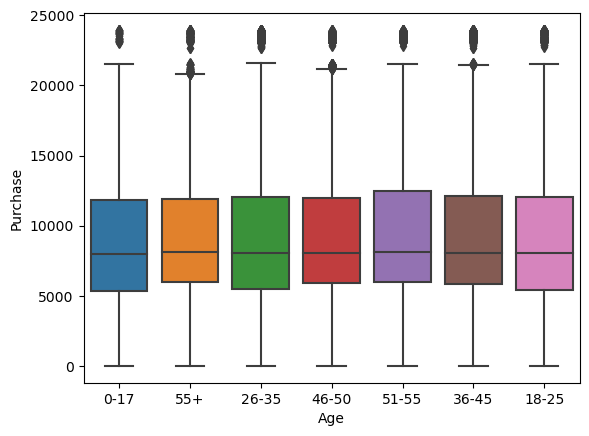

In [93]:
sns.boxplot(x = 'Age', y = 'Purchase', data = data);
# Age is proving to be insignificant, let's check it statistically

In [94]:
# H0: Age and Purchase are not Corelated
# H1: Age and Purchase is Correlated
model = sfa.ols('data.Purchase~data.Age', data).fit()
anova_lm(model)
# Conclude - Since P_value is less than 0.05, We Reject the null hypothesis: Age and Purchase are
# co-releated

,df,sum_sq,mean_sq,F,PR(>F)
data.Age,6.0,6.140003e+09,1.023334e+09,40.575799,1.053564e-49
Residual,550061.0,1.387270e+13,2.522030e+07,NaN,NaN


In [95]:
# Age into numbers
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [96]:
data['numeric_Age'] = data.Age.replace({'0-17': (0+17)/2,'18-25': (18+25)/2 ,
                                        '26-35' : (26+35)/2,'36-45': (36+45)/2, 
                                        '46-50' : (46+50)/2, '51-55' : (51+55)/2,
                                        '55+' : '56'}).astype(float)

In [99]:
data.numeric_Age.isnull().sum()

0

In [120]:
# Let's Statsically verify if Age and Purchase has any relation
# H0: Age and Purchase are Independent
# H1: Age and Purchase are Dependent

# Two Sample Independent T-test
stats.ttest_ind(data.numeric_Age, data.Purchase) 
# Purchase has some missing value, before verifying it statistically let's treat the missing 
# value of Purchase

Ttest_indResult(statistic=nan, pvalue=nan)

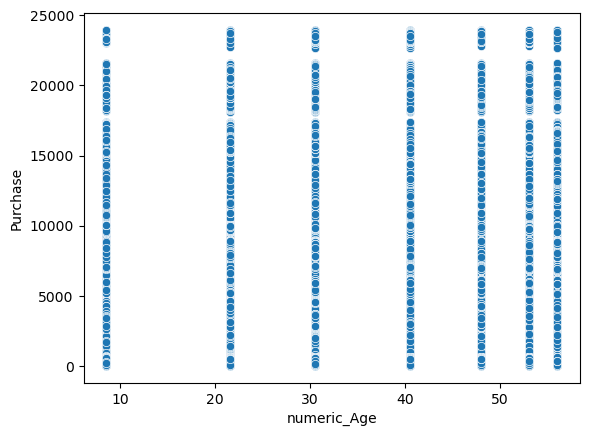

In [116]:
sns.scatterplot(x = data.numeric_Age, y = data.Purchase);

In [145]:
#for a,b in data.loc[data['Age'] != '55+', 'Age'].str.split('-'):
  #  print((pd.to_numeric(a) + pd.to_numeric(b))/2)

In [ ]:
from ydata_profiling import ProfileReport


<Figure size 1000x1000 with 0 Axes>

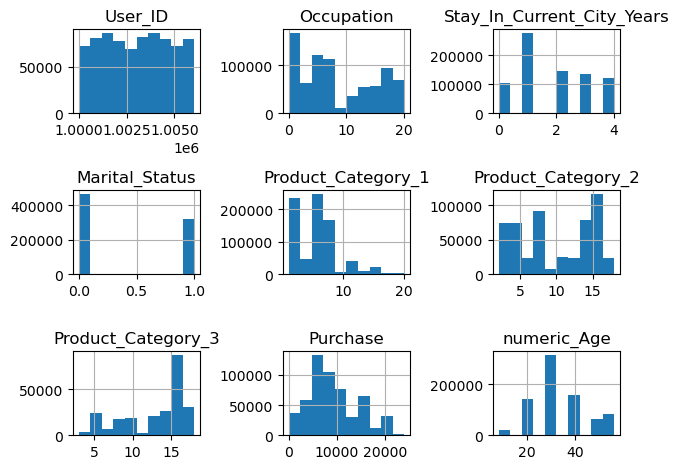

In [150]:
# Numerical Variable
plt.figure(figsize = (10,10))
data.hist()
plt.tight_layout()
plt.show()

In [152]:
data.User_ID.value_counts()

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1000341      13
1003275      13
1002037      13
1004991      13
1006034      13
Name: User_ID, Length: 5891, dtype: int64

In [156]:
data.Product_ID.value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00185942       1
P00104342       1
P00074742       1
P00081342       1
P00253842       1
Name: Product_ID, Length: 3677, dtype: int64

In [153]:
data.loc[data['User_ID'] == 1001680]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,numeric_Age
11055,1001680,P00036742,M,26-35,20,A,3,1,1,16.0,NaN,15670.0,30.5
11056,1001680,P00130642,M,26-35,20,A,3,1,11,16.0,NaN,6139.0,30.5
11057,1001680,P00105442,M,26-35,20,A,3,1,11,NaN,NaN,7607.0,30.5
11058,1001680,P00245642,M,26-35,20,A,3,1,5,11.0,12.0,8715.0,30.5
11059,1001680,P00123342,M,26-35,20,A,3,1,11,NaN,NaN,4472.0,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230813,1001680,P00278142,M,26-35,20,A,3,1,11,16.0,NaN,NaN,30.5
230814,1001680,P00290042,M,26-35,20,A,3,1,8,NaN,NaN,NaN,30.5
230815,1001680,P00257542,M,26-35,20,A,3,1,5,NaN,NaN,NaN,30.5
230816,1001680,P00258242,M,26-35,20,A,3,1,5,NaN,NaN,NaN,30.5


In [154]:
data.groupby('Product_ID')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_ID,,,,,,,,
P00000142,1152.0,11143.642361,2305.175261,2725.0,10591.75,10927.0,13379.25,13716.0
P00000242,376.0,10551.851064,3170.603417,3214.0,9588.00,10023.0,13029.00,16503.0
P00000342,244.0,5313.422131,1824.925693,1727.0,3702.75,5287.0,6928.75,8896.0
P00000442,92.0,4795.358696,1664.088125,1764.0,3599.75,5194.0,5394.75,8891.0
P00000542,149.0,5417.530201,1724.458154,1730.0,3750.00,5376.0,6955.00,8903.0
...,...,...,...,...,...,...,...,...
P0099542,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0099642,13.0,6439.230769,2108.412442,3903.0,4222.00,5972.0,7862.00,10056.0
P0099742,126.0,7872.603175,2921.579042,2670.0,5626.00,8183.5,10636.75,13661.0


### Feature Enginnering

In [171]:
newtrain = data.iloc[0:train_data.shape[0], ]
newtest = data.iloc[train_data.shape[0]:, ]

In [172]:
newtrain.shape, train_data.shape, newtest.shape, test_data.shape, data.shape

((550068, 13), (550068, 12), (233599, 13), (233599, 11), (783667, 13))

In [178]:
newtrain['product_count'] = newtrain.groupby('Product_ID')['Purchase'].transform('count')
newtrain['product_min'] = newtrain.groupby('Product_ID')['Purchase'].transform('min')
newtrain['product_max'] = newtrain.groupby('Product_ID')['Purchase'].transform('max')
newtrain['product_std'] = newtrain.groupby('Product_ID')['Purchase'].transform('std')
newtrain['product_mean'] = newtrain.groupby('Product_ID')['Purchase'].transform('mean')
newtrain['product_median'] = newtrain.groupby('Product_ID')['Purchase'].transform('median')

/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/2739284821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain['product_count'] = newtrain.groupby('Product_ID')['Purchase'].transform('count')
/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/2739284821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain['product_min'] = newtrain.groupby('Product_ID')['Purchase'].transform('min')
/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/2739284821.py:3

In [179]:
newtest['product_count'] = newtrain.groupby('Product_ID')['Purchase'].transform('count')
newtest['product_min'] = newtrain.groupby('Product_ID')['Purchase'].transform('min')
newtest['product_max'] = newtrain.groupby('Product_ID')['Purchase'].transform('max')
newtest['product_std'] = newtrain.groupby('Product_ID')['Purchase'].transform('std')
newtest['product_mean'] = newtrain.groupby('Product_ID')['Purchase'].transform('mean')
newtest['product_median'] = newtrain.groupby('Product_ID')['Purchase'].transform('median')

/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/3293379612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtest['product_count'] = newtrain.groupby('Product_ID')['Purchase'].transform('count')
/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/3293379612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtest['product_min'] = newtrain.groupby('Product_ID')['Purchase'].transform('min')
/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/3293379612.py:3: 

In [180]:
newtrain['user_count'] = newtrain.groupby('User_ID')['Purchase'].transform('count')
newtrain['user_min'] = newtrain.groupby('User_ID')['Purchase'].transform('min')
newtrain['user_max'] = newtrain.groupby('User_ID')['Purchase'].transform('max')
newtrain['user_std'] = newtrain.groupby('User_ID')['Purchase'].transform('std')
newtrain['user_mean'] = newtrain.groupby('User_ID')['Purchase'].transform('mean')
newtrain['user_median'] = newtrain.groupby('User_ID')['Purchase'].transform('median')

/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/1079504740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain['user_count'] = newtrain.groupby('User_ID')['Purchase'].transform('count')
/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/1079504740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain['user_min'] = newtrain.groupby('User_ID')['Purchase'].transform('min')
/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/1079504740.py:3: SettingWit

In [181]:
newtest['user_count'] = newtrain.groupby('User_ID')['Purchase'].transform('count')
newtest['user_min'] = newtrain.groupby('User_ID')['Purchase'].transform('min')
newtest['user_max'] = newtrain.groupby('User_ID')['Purchase'].transform('max')
newtest['user_std'] = newtrain.groupby('User_ID')['Purchase'].transform('std')
newtest['user_mean'] = newtrain.groupby('User_ID')['Purchase'].transform('mean')
newtest['user_median'] = newtrain.groupby('User_ID')['Purchase'].transform('median')

/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/4132199192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtest['user_count'] = newtrain.groupby('User_ID')['Purchase'].transform('count')
/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/4132199192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtest['user_min'] = newtrain.groupby('User_ID')['Purchase'].transform('min')
/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/4132199192.py:3: SettingWithC

In [183]:
newtest.isnull().sum().loc[newtest.isnull().sum() != 0]

Product_Category_2     72344
Product_Category_3    162562
Purchase              233599
product_std               59
dtype: int64

In [184]:
newtrain.isnull().sum().loc[newtest.isnull().sum() != 0]

Product_Category_2    173638
Product_Category_3    383247
Purchase                   0
product_std              144
dtype: int64

In [191]:
copy = newtrain.dropna()
copy.select_dtypes(exclude = 'object').columns

Index(['User_ID', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'numeric_Age', 'product_count', 'product_min',
       'product_max', 'product_std', 'product_mean', 'product_median',
       'user_count', 'user_min', 'user_max', 'user_std', 'user_mean',
       'user_median'],
      dtype='object')

In [192]:
cols = ['User_ID', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'numeric_Age', 'product_count', 'product_min',
       'product_max', 'product_std', 'product_mean', 'product_median',
       'user_count', 'user_min', 'user_max', 'user_std', 'user_mean',
       'user_median']

list_cols = []
for i in cols:
    test_stats, p_value = stats.ttest_ind(copy.loc[:,i], copy.Purchase)
    
    if (p_value < 0.05):
        print(i)
        list_cols.append(i)
        
    else:
        pass

User_ID
Occupation
Stay_In_Current_City_Years
Marital_Status
Product_Category_1
Product_Category_2
Product_Category_3
numeric_Age
product_count
product_min
product_max
product_std
product_median
user_count
user_min
user_max
user_std
user_mean
user_median


In [195]:
newtest.drop(columns = 'product_mean', inplace = True)

/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/2476964724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtest.drop(columns = 'product_mean', inplace = True)


In [196]:
newtrain.drop(columns = 'product_mean', inplace = True)

/var/folders/ww/s582n_2j1z98f1zx70j5c6pc0000gn/T/ipykernel_56164/3262854952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain.drop(columns = 'product_mean', inplace = True)


In [197]:
newtrain.shape

(550068, 24)

In [203]:
newtrain.isnull().sum()[newtrain.isnull().sum() != 0]

Product_Category_2    173638
Product_Category_3    383247
product_std              144
dtype: int64

In [204]:
newtrain.product_std.fillna(0, inplace = True)
newtest.product_std.fillna(0, inplace = True)

In [205]:
newtrain.isnull().sum()[newtrain.isnull().sum() != 0]

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [211]:
newtest.isnull().sum()[newtest.isnull().sum() != 0]

Product_Category_2     72344
Product_Category_3    162562
Purchase              233599
dtype: int64

<Axes: >

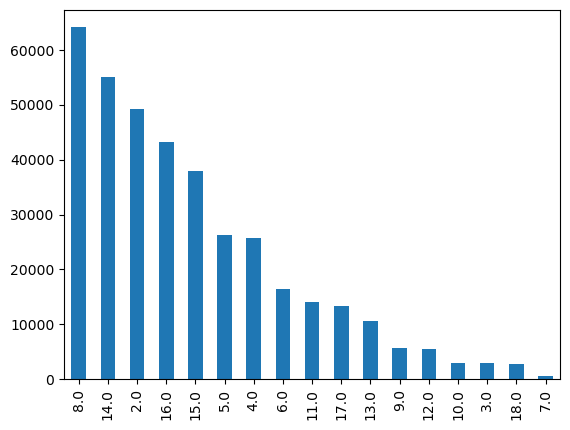

In [232]:
newtrain.Product_Category_2.value_counts().plot(kind = 'bar')

In [235]:
newtrain['Product_Category_2'] = newtrain.groupby(['City_Category','Gender'])['Product_Category_2'].apply(lambda x: x.fillna(x.median()))

In [236]:
newtrain['Product_Category_3'] = newtrain.groupby(['City_Category','Gender'])['Product_Category_3'].apply(lambda x: x.fillna(x.median()))

In [247]:
newtrain.isnull().sum()[newtrain.isnull().sum() != 0]

Series([], dtype: int64)

In [238]:
newtest['Product_Category_2'] = newtest.groupby(['City_Category','Gender'])['Product_Category_2'].apply(lambda x: x.fillna(x.median()))

In [241]:
newtest['Product_Category_3'] = newtest.groupby(['City_Category','Gender'])['Product_Category_3'].apply(lambda x: x.fillna(x.median()))

In [248]:
newtest.isnull().sum()[newtest.isnull().sum() != 0]

Series([], dtype: int64)

In [245]:
newtrain.drop(columns = ['User_ID','Product_ID'], axis = 1, inplace = True)
newtest.drop(columns = ['Purchase','User_ID','Product_ID'], inplace = True)

In [246]:
newtrain.shape, newtest.shape

((550068, 22), (233599, 21))

<Axes: xlabel='Occupation'>

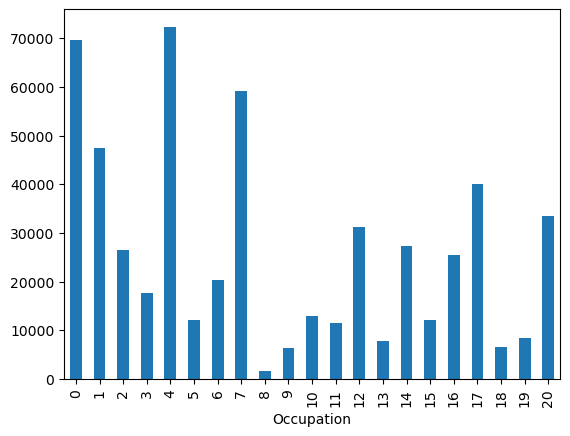

In [251]:
newtrain.groupby('Occupation')['Purchase'].count().plot(kind = 'bar')

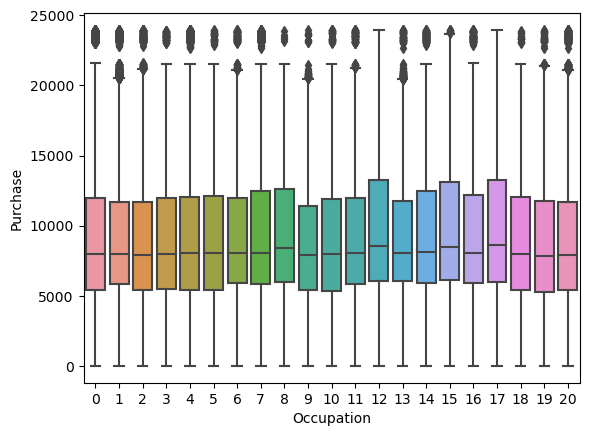

In [252]:
sns.boxplot(x = 'Occupation', y = 'Purchase', data = newtrain);

In [253]:
model = sfa.ols('Purchase~Occupation', newtrain).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Occupation,1.0,6.023389e+09,6.023389e+09,238.831156,7.259684e-54
Residual,550066.0,1.387282e+13,2.522028e+07,NaN,NaN


In [255]:
mapped = {'0-17' : 1, '18-25' : 2, '26-35' : 3, '36-45' : 4, '46-50' : 5, '51-55' : 6, '55+' : 7}

In [257]:
newtrain.Age = newtrain.Age.map(mapped)

In [258]:
newtest.Age = newtest.Age.map(mapped)

In [259]:
dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [263]:
# Splitting the data
X = dummytrain.drop(columns = 'Purchase', axis = 1)
y = dummytrain['Purchase']

In [264]:
Kfold = KFold(n_splits = 5, shuffle = True , random_state = 42)

dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gdm = GradientBoostingRegressor()

pred_tree = []
pred_rf = []
pred_gdm = []

for train_index, test_index in Kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred_tree.append(dt.fit(xtrain,ytrain).predict(dummytest))
    pred_rf.append(rf.fit(xtrain,ytrain).predict(dummytest))
    pred_gdm.append(gdm.fit(xtrain,ytrain).predict(dummytest))

In [ ]:
# Stacking Regressor Model
from sklearn.ensemble import StackingRegressor

xgboost = XGBRegressor()

stack = StackingRegressor(estimators = [dt, rf, gdm], final_estimators = xgboost)

stacking_pred = []
for train_index, test_index in Kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    stacking_pred.append(stack.fit(xtrain,ytrain).predict(dummytest))